# Deploying XGBoost Model

## Step 1: Import Libraries

In [1]:
import segyio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from scipy.ndimage import gaussian_filter
import joblib
import seaborn as sns 

## Step 2: Load and Prepare Data

In [2]:
# Note: the the xline header info location is at segyio.su.cdpx [181]
def segy2numpy(filename: str) -> np.array:
    with segyio.open(filename, xline=181) as segyfile:
        return segyio.tools.cube(segyfile)

In [3]:
# First load datasets
filename_pp = "C:\\Users\\hsk21\\Desktop\\MLcourse\\github\\Seismic-Fault-Detection-using-Convolutional-Neural-Network\\Equinor Synthetic model\\Equinor Synthetic model\\issap20_Pp.sgy"
filename_ai = "C:\\Users\\hsk21\\Desktop\\MLcourse\\github\\Seismic-Fault-Detection-using-Convolutional-Neural-Network\\Equinor Synthetic model\\Equinor Synthetic model\\issap20_Fault.sgy"
filename_fault = "C:\\Users\\hsk21\\Desktop\\MLcourse\\github\\Seismic-Fault-Detection-using-Convolutional-Neural-Network\\Equinor Synthetic model\\Equinor Synthetic model\\issap20_Fault.sgy"


In [4]:
# Note: the the xline header info location is at segyio.su.cdpx [181]
def segy2numpy(filename: str) -> np.array:
    with segyio.open(filename, xline=181) as segyfile:
        return segyio.tools.cube(segyfile)

seismic = segy2numpy(filename_pp)
ai = segy2numpy(filename_ai)
fault = segy2numpy(filename_fault)
# f"Number of inlines: {seismic.shape[0]}, crosslines: {seismic.shape[1]}, samples: {seismic.shape[2]}"

In [5]:
# Step 2: Data Preprocessing
def preprocess_data(seismic, fault):
    # Flatten seismic and fault cubes to 1D
    seismic_flattened = seismic.ravel()  # Features
    fault_flattened = fault.ravel()      # Labels

    return seismic_flattened, fault_flattened

# Preprocess data
X, y = preprocess_data(seismic, fault)

# Convert X into a single-column feature array
X = X.reshape(-1, 1)  # Each feature becomes a single-column input

print(f"Flattened Features shape: {X.shape}, Flattened Labels shape: {y.shape}")

Flattened Features shape: (44676239, 1), Flattened Labels shape: (44676239,)


In [6]:
# Balance the dataset using SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)
print(f"Balanced data shape: {X_resampled.shape}, {y_resampled.shape}")


Balanced data shape: (88097482, 1), (88097482,)


In [7]:
# Step 3: Dataset Preparation
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 70477985, Testing samples: 17619497


In [12]:
# Step 4: Model Training with Hyperparameter Tuning
param_grid = {
    # 'n_estimators': [50, 100, 200],
    # 'max_depth': [4, 6, 8],
    # 'learning_rate': [0.01, 0.1, 0.2],
    # 'subsample': [0.8, 1.0],
    'n_estimators': [100],
    'max_depth': [6],
    'learning_rate': [0.01],
    'subsample': [1],
}

grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric="logloss"), param_grid, cv=3, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Use the best model
model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Save the trained model
joblib.dump(model, "xgboost_seismic_model.pkl")
print("Model saved as 'xgboost_seismic_model.pkl'.")


Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\hsk21\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [22:04:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1; total time= 6.6min


c:\Users\hsk21\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [22:10:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1; total time= 6.9min


c:\Users\hsk21\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [22:17:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1; total time=10.4min


c:\Users\hsk21\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [22:28:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1}
Model saved as 'xgboost_seismic_model.pkl'.


Optimal Threshold: 0.3659902513027191
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.05      0.10   8811089
         1.0       0.51      0.98      0.67   8808408

    accuracy                           0.52  17619497
   macro avg       0.60      0.52      0.38  17619497
weighted avg       0.60      0.52      0.38  17619497



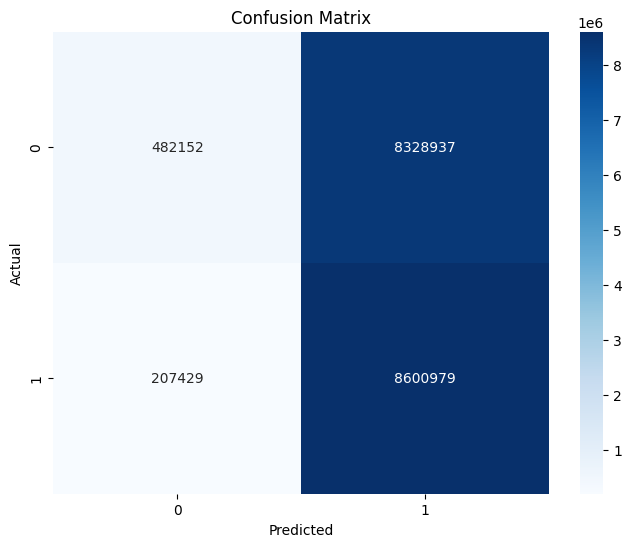

In [11]:
# Step 5: Prediction and Evaluation
# Make predictions
y_proba = model.predict_proba(X_test)[:, 1]

# Precision-Recall Curve and Optimal Threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")

# Apply threshold
y_pred = (y_proba >= optimal_threshold).astype(int)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix")
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


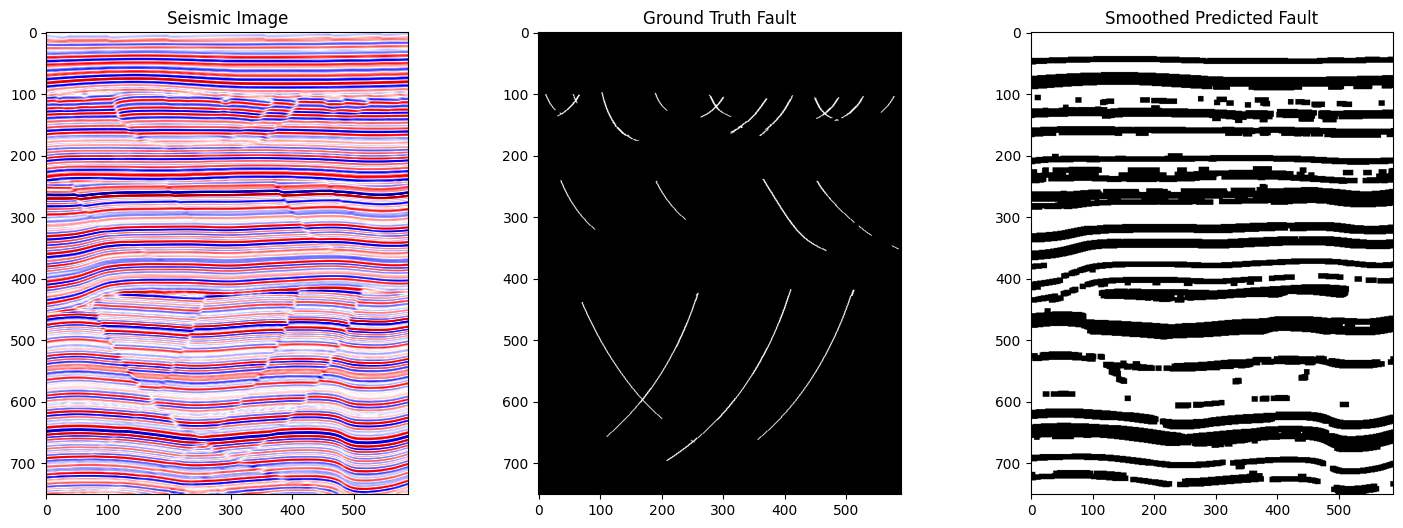

In [10]:
# Step 6: Visualization of Results
def visualize_predictions(model, seismic, fault, threshold=optimal_threshold):
    # Flatten seismic data for prediction
    seismic_flattened = seismic.ravel().reshape(-1, 1)
    
    # Predict and reshape into the original seismic shape
    y_proba = model.predict_proba(seismic_flattened)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)
    predicted_fault_map = y_pred.reshape(seismic.shape)

    # Smooth predictions
    smoothed_pred = gaussian_filter(predicted_fault_map, sigma=1)

    # Visualize an inline of seismic data, ground truth, and prediction
    ILINE = 10
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(seismic[ILINE, :, :].T, cmap="seismic")
    plt.title("Seismic Image")
    plt.subplot(1, 3, 2)
    plt.imshow(fault[ILINE, :, :].T, cmap="gray")
    plt.title("Ground Truth Fault")
    plt.subplot(1, 3, 3)
    plt.imshow(smoothed_pred[ILINE, :, :].T, cmap="gray")
    plt.title("Smoothed Predicted Fault")
    plt.show()

# Visualize predictions
visualize_predictions(model, seismic, fault)